In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('Spotify-2000.csv', index_col=0)

In [3]:
df.describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [4]:
df.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1 to 1994
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 233.7+ KB


In [6]:
df["Length (Duration)"].value_counts()

215      23
243      21
241      20
236      20
217      20
         ..
471       1
966       1
564       1
433       1
1,292     1
Name: Length (Duration), Length: 350, dtype: int64

In [7]:
df[df["Length (Duration)"] == '1,367']

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
952,Autobahn - 2009 Remaster,Kraftwerk,dance rock,1974,82,50,33,-16,13,11,"1,367",11,4,48


In [8]:
def convert_lenght(x : str):
    if ',' in x: 
        x = x.replace(',' , '')
    return int(x)

df["Length (Duration)"] = df["Length (Duration)"].apply(convert_lenght)

<AxesSubplot:>

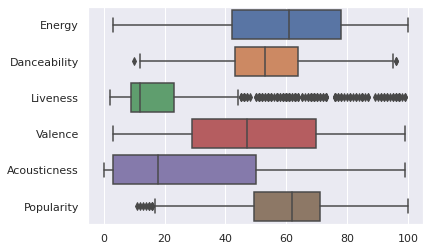

In [9]:
# df.boxplot(column=, rot=90)
sns.boxplot(data=df[['Energy', 'Danceability', 'Liveness', 'Valence', 'Acousticness', 'Popularity']], orient='h')

<AxesSubplot:xlabel='Beats Per Minute (BPM)'>

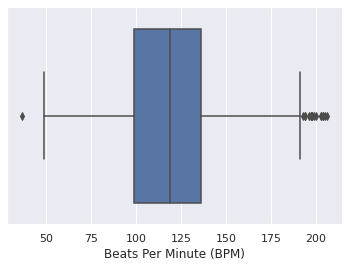

In [10]:
# df.boxplot(column='Beats Per Minute (BPM)')
sns.boxplot(x=df['Beats Per Minute (BPM)'], orient='h')

<AxesSubplot:xlabel='Speechiness'>

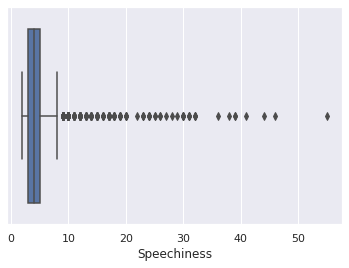

In [11]:
# df.boxplot(column='Speechiness')
sns.boxplot(data=df, x='Speechiness', orient='h')

[Text(0, 0, 'Beats Per Minute (BPM)'),
 Text(1, 0, 'Energy'),
 Text(2, 0, 'Danceability'),
 Text(3, 0, 'Loudness (dB)'),
 Text(4, 0, 'Liveness'),
 Text(5, 0, 'Valence'),
 Text(6, 0, 'Length (Duration)'),
 Text(7, 0, 'Acousticness'),
 Text(8, 0, 'Speechiness'),
 Text(9, 0, 'Popularity')]

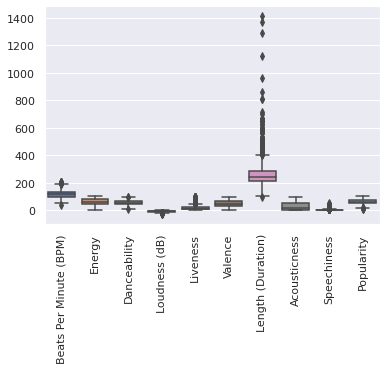

In [12]:
# df.boxplot(column= 'Loudness (dB)')
g = sns.boxplot(data=df.drop('Year', axis=1), orient='v')
g.set_xticklabels(labels = g.get_xticklabels(),rotation=90)

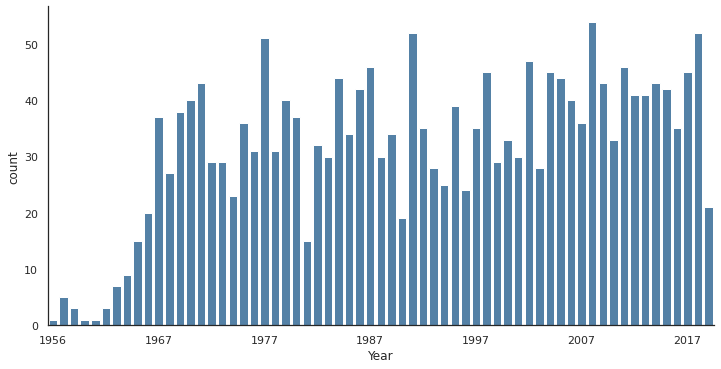

In [13]:
with sns.axes_style('white'):
    g = sns.catplot(data=df, x='Year', aspect=2, kind='count', color='steelblue')
    g.set_xticklabels(step=10)

/home/ninideol/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ninideol/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ninideol/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ninideol/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ninideol/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ninideol/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

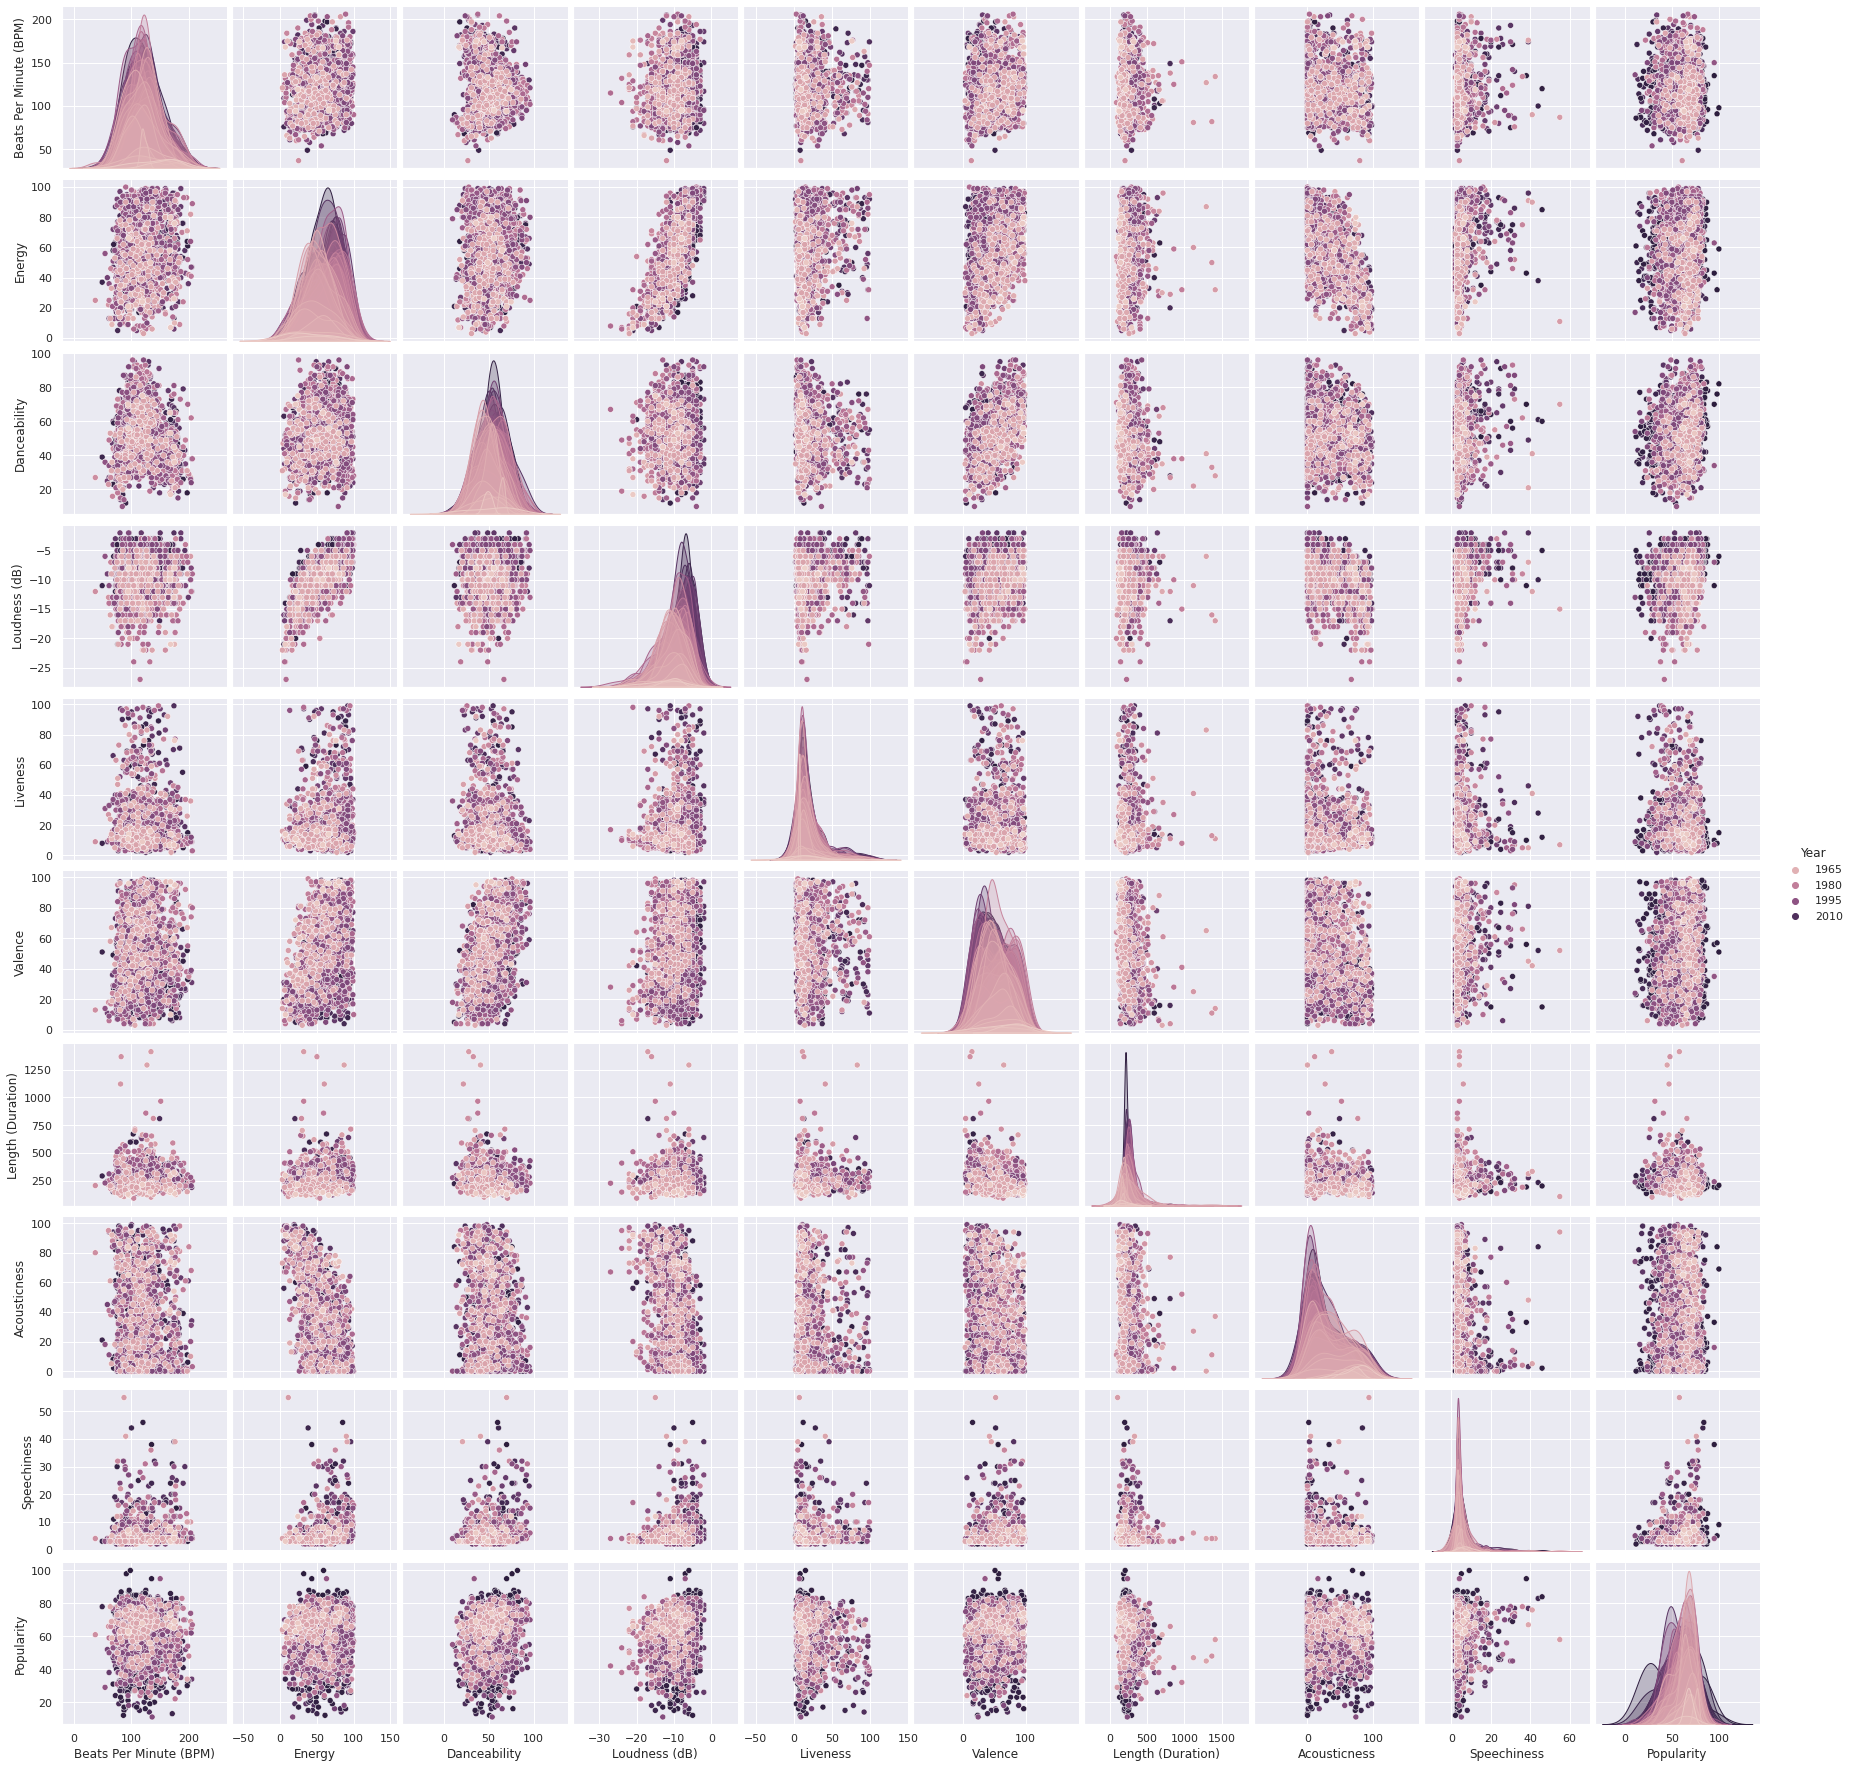

In [14]:
sns.pairplot(df, hue = 'Year')

In [15]:
df.describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


In [16]:
df.corr()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Year,1.000000,0.012570,0.147235,0.077493,0.343764,0.019017,-0.166163,-0.050346,-0.132946,0.054097,-0.158962
Beats Per Minute (BPM),0.012570,1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,0.006252,-0.122472,0.085598,-0.003181
Energy,0.147235,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,0.022800,-0.665156,0.205865,0.103393
Danceability,0.077493,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135432,-0.135769,0.125229,0.144344
Loudness (dB),0.343764,0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.056127,-0.451635,0.125090,0.165527
Liveness,0.019017,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,0.032499,-0.046206,0.092594,-0.111978
Valence,-0.166163,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.203690,-0.239729,0.107102,0.095911
Length (Duration),-0.050346,0.006252,0.022800,-0.135432,-0.056127,0.032499,-0.203690,1.000000,-0.102319,-0.027826,-0.065403
Acousticness,-0.132946,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,-0.102319,1.000000,-0.098256,-0.087604
Speechiness,0.054097,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.027826,-0.098256,1.000000,0.111689


In [17]:
df["Year"].value_counts().mean()

31.650793650793652

In [18]:
nb_values = df["Top Genre"].value_counts()
nb_values

album rock          413
adult standards     123
dutch pop            88
alternative rock     86
dance pop            83
                   ... 
ccm                   1
celtic punk           1
afropop               1
icelandic indie       1
soft rock             1
Name: Top Genre, Length: 149, dtype: int64

In [19]:
# first extracting the genre columns
# getting rid of white spaces and turning it all into lower cases
genre = (df["Top Genre"].str.strip()).str.lower()

# function to split the genre column
def genre_splitter(genre):
    result = genre.copy()
    result = result.str.split(" ")
    for i in range(1, len(result) + 1):
        result[i] = [result[i][len(result[i]) - 1]]
        
    return result.str.join('')

In [20]:
genre_m1 = genre.copy()
genre_m1 = genre_splitter(genre_m1)

genre_m1.value_counts()

rock             856
pop              333
standards        123
metal             93
indie             77
                ... 
electronica        1
levenslied         1
rock-and-roll      1
holler             1
bebop              1
Name: Top Genre, Length: 68, dtype: int64

In [21]:
best_genre = genre_m1.value_counts().head(10).index

In [22]:
best_genre

Index(['rock', 'pop', 'standards', 'metal', 'indie', 'cabaret', 'soul', 'wave',
       'invasion', 'hop'],
      dtype='object')

In [23]:
for g in best_genre:
    df[g] = (df["Top Genre"].str.split(' ').str[-1] == g).astype(int)

In [24]:
df = df.drop(df[df[best_genre.tolist()].sum(axis=1)==0].index)

In [25]:
df[df[best_genre.tolist()].sum(axis=1)==0]

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,...,rock,pop,standards,metal,indie,cabaret,soul,wave,invasion,hop
Index,,,,,,,,,,,,,,,,,,,,,


In [26]:
df = df.rename(columns={'hop': 'Hip-hop', 'rock' : 'Rock', 'pop':'Pop', 'standards':'Standards', 'metal':'Metal', 
'indie': 'Indie', 'cabaret':'Cabaret', 'soul':'Soul', 'wave':'Wave', 'invasion': 'Invasion'})
df

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,...,Rock,Pop,Standards,Metal,Indie,Cabaret,Soul,Wave,Invasion,Hip-hop
Index,,,,,,,,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,...,0,0,1,0,0,0,0,0,0,0
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,...,1,0,0,0,0,0,0,0,0,0
3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,...,0,0,0,0,0,0,0,0,0,1
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,...,0,0,0,1,0,0,0,0,0,0
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Summertime,Louis Armstrong,adult standards,1958,168,7,17,-21,14,10,...,0,0,1,0,0,0,0,0,0,0
1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,...,0,0,1,0,0,0,0,0,0,0
1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,...,0,0,1,0,0,0,0,0,0,0


In [27]:
df.to_csv('cleaned_music.csv')

In [28]:
result = df.drop(df.iloc[:,4:],axis=1)
cleaned_data = df.drop(df.iloc[:,:4],axis=1)
result.to_csv('result.csv')
cleaned_data.to_csv('cleaned_data.csv')